# Anomaly Detection in Network Traffic using PCA and KDD cup 1999 dataset

In [1]:
import pandas as pd
import numpy as np

In [9]:
import os
import requests

files = [
    ("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "kddcup.data_10_percent.gz"),
    ("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names", "kddcup.names")
]

for url, filename in files:
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"{filename} already exists. Skipping download.")

Downloaded kddcup.data_10_percent.gz
Downloaded kddcup.names


In [17]:
with open("kddcup.names", "r") as f:
    lines = f.readlines()

column_names = [line.split(":")[0].strip() for line in lines[1:]]
column_names.append("label")

In [19]:
df = pd.read_csv("kddcup.data_10_percent.gz", header=None, names=column_names)

In [21]:
df["label"] = df["label"].astype("category")

In [23]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [25]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     494021 non-null  int64   
 1   protocol_type                494021 non-null  object  
 2   service                      494021 non-null  object  
 3   flag                         494021 non-null  object  
 4   src_bytes                    494021 non-null  int64   
 5   dst_bytes                    494021 non-null  int64   
 6   land                         494021 non-null  int64   
 7   wrong_fragment               494021 non-null  int64   
 8   urgent                       494021 non-null  int64   
 9   hot                          494021 non-null  int64   
 10  num_failed_logins            494021 non-null  int64   
 11  logged_in                    494021 non-null  int64   
 12  num_compromised              494021 non-null

# Ecoding Categorical Features

In [31]:
from sklearn.preprocessing import LabelEncoder

for col in ["protocol_type", "service", "flag"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [33]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Normalize Numerical Features

In [36]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [38]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.067792,0.925753,-0.104067,0.514274,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.694315,0.599396,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.
1,-0.067792,0.925753,-0.104067,0.514274,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.600011,0.599396,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.
2,-0.067792,0.925753,-0.104067,0.514274,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.505707,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.
3,-0.067792,0.925753,-0.104067,0.514274,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.411403,0.599396,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.
4,-0.067792,0.925753,-0.104067,0.514274,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-1.317100,0.599396,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal.


# Dimensionality Reduction with PCA

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[numeric_cols])

#Convert PCA result into DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["label"] = df["label"].cat.codes #keep labels for visualization

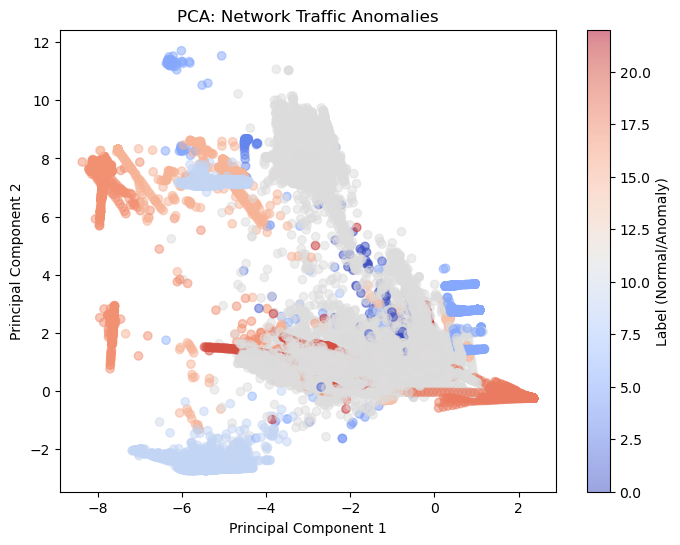

In [43]:
#Scatter plot of PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['label'], cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Network Traffic Anomalies")
plt.colorbar(scatter, label="Label (Normal/Anomaly)")
plt.show()

# Training an Isolation Forest Model

In [46]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(df[numeric_cols])

#convert predictions (-1 for anomaly and 1 for normal) into binary format
df['anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

In [48]:
df['anomaly'].value_counts()

anomaly
0    444619
1     49402
Name: count, dtype: int64

# Model Evaluation

In [51]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

#Convert label into binary (0 for normal, 1 for anomaly)
df['binary_label'] = df['label'].apply(lambda x: 1 if x != 'normal.' else 0)

In [53]:
print("Isolation Forest Metrics:")
print(classification_report(df["binary_label"], df["anomaly"]))
print("ROC-AUC score:", roc_auc_score(df["binary_label"], df["anomaly"]))
print("Confusion Matrix", confusion_matrix(df["binary_label"], df["anomaly"]))

Isolation Forest Metrics:
              precision    recall  f1-score   support

           0       0.18      0.80      0.29     97278
           1       0.61      0.08      0.14    396743

    accuracy                           0.22    494021
   macro avg       0.39      0.44      0.21    494021
weighted avg       0.52      0.22      0.17    494021

ROC-AUC score: 0.43901137415494984
Confusion Matrix [[ 78021  19257]
 [366598  30145]]


# Visualization

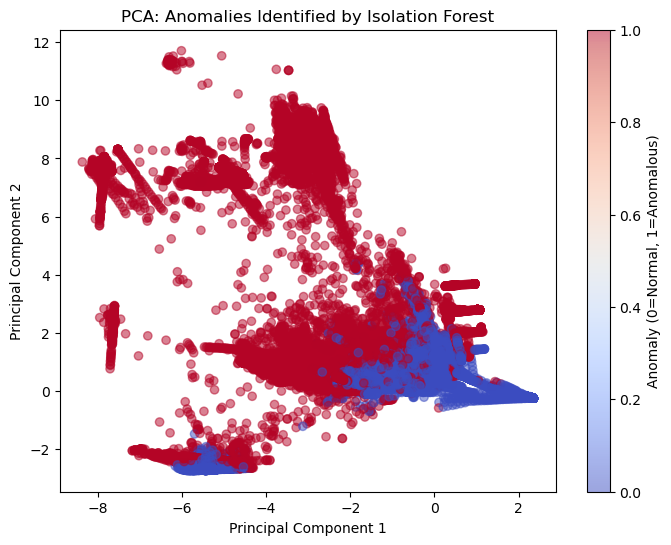

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['anomaly'], cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Anomalies Identified by Isolation Forest")
plt.colorbar(label="Anomaly (0=Normal, 1=Anomalous)")
plt.show()

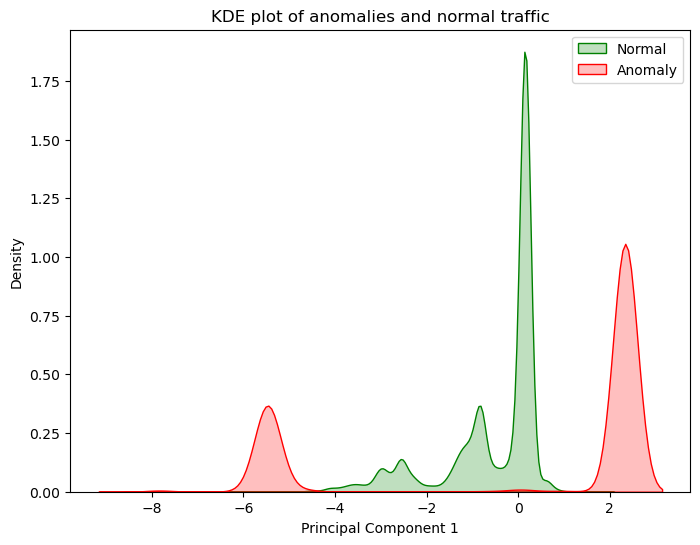

In [64]:
import seaborn as sns
df_pca['binary_label'] = df['label'].apply(lambda x: 1 if x != 'normal.' else 0)

plt.figure(figsize=(8, 6))
sns.kdeplot(df_pca[df_pca['binary_label'] == 0]['PC1'], label="Normal", fill=True, color='g')
sns.kdeplot(df_pca[df_pca['binary_label'] == 1]['PC1'], label="Anomaly", fill=True, color='r')
plt.xlabel("Principal Component 1")
plt.ylabel("Density")
plt.title("KDE plot of anomalies and normal traffic")
plt.legend()
plt.show()